# Experiment - 5 (Naive Bayes)


Problem Statement :- Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.


In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import random 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

import seaborn as sns
import statsmodels.api as sm

In [9]:
# Importing the dataset
dataset = pd.read_csv("pima-indians-diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
dataset.shape

(768, 9)

In [12]:
X = dataset.drop("Outcome", axis=1)
Y = dataset[["Outcome"]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)


In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7835497835497836


In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix for the Model:  ")
cnf_matrix


Confusion Matrix for the Model:  


array([[128,  18],
       [ 32,  53]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

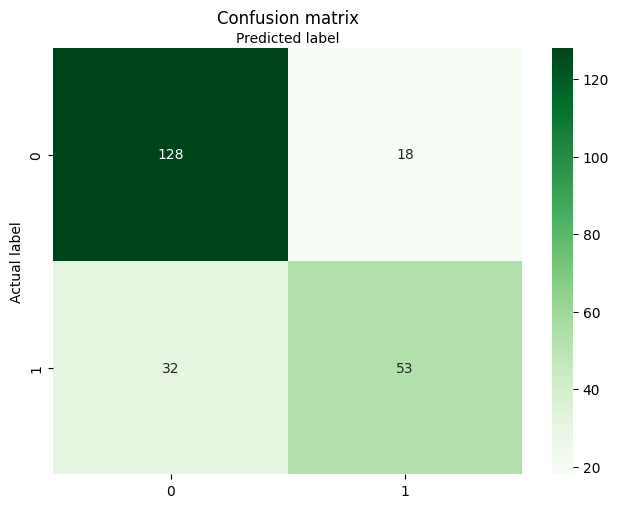

In [18]:
class_names=[0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
target_names = ['Diabetes Negative', 'Diabetes Positive']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))


                   precision    recall  f1-score   support

Diabetes Negative       0.80      0.88      0.84       146
Diabetes Positive       0.75      0.62      0.68        85

         accuracy                           0.78       231
        macro avg       0.77      0.75      0.76       231
     weighted avg       0.78      0.78      0.78       231

